In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

In [2]:
import requests

In [48]:
data = requests.get("http://rest.kegg.jp/list/module").text

In [44]:
def kpow(m, k): return np.power(m, k)

def kpow_np(m, k):
    res = m
    for i in range(k - 1):
        res = np.matmul(res, m)

    return res

def matmul_manual(A, B):
    C = np.zeros((A.shape[1], B.shape[0]))
    
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            for k in range(A.shape[1]):
                C[i, j] += A[i, k] * B[k, j]
#             C[i, j] = np.dot(A[i, :], B[:, j])
                             
    return C

def kpow_manual(m, k):
    res = m

    for p in range(k - 1):
        res = matmul_manual(res, m)
                    
    return res

In [45]:
mat = np.array([[1, 0], [0, 1]])

np.all(kpow_manual(mat, 2)
       == kpow(mat, 2))

True

In [46]:
%timeit kpow_manual(mat, 20)
%timeit kpow_np(mat, 20)
%timeit kpow(mat, 20)

191 µs ± 7.99 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
38.3 µs ± 2.09 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.33 µs ± 19.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [52]:
data = requests.get("http://rest.kegg.jp/list/compound").text

In [67]:
df = pd.read_csv(StringIO(data), delimiter="\t", header=None)
ids = df.iloc[:, 0]

In [73]:
results = []
for strids in np.array_split(ids, 500):
    joined_id = "+".join(strids)
    
    print("Fetching")
    res = requests.get("http://rest.kegg.jp/get/" + joined_id).text
    results.append(res)
    

Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
Fetching
F

ConnectionError: HTTPConnectionPool(host='rest.kegg.jp', port=80): Max retries exceeded with url: /get/cpd:C17352+cpd:C17353+cpd:C17354+cpd:C17355+cpd:C17356+cpd:C17357+cpd:C17358+cpd:C17359+cpd:C17360+cpd:C17361+cpd:C17362+cpd:C17363+cpd:C17364+cpd:C17365+cpd:C17366+cpd:C17367+cpd:C17368+cpd:C17369+cpd:C17370+cpd:C17371+cpd:C17372+cpd:C17373+cpd:C17374+cpd:C17375+cpd:C17376+cpd:C17377+cpd:C17378+cpd:C17379+cpd:C17380+cpd:C17381+cpd:C17382+cpd:C17383+cpd:C17384+cpd:C17385+cpd:C17386+cpd:C17387 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x12235f9b0>: Failed to establish a new connection: [Errno 60] Operation timed out',))

In [65]:
ids = "+".join()

In [66]:
formulas = requests.get("http://rest.kegg.jp/get/" + ids).text

ConnectionError: ('Connection aborted.', BrokenPipeError(32, 'Broken pipe'))

In [61]:
formulas = []
for cpd in df.iloc[:, 0]:
    print("Getting " + cpd)
    formulas.append(requests.get("http://rest.kegg.jp/get/" + cpd).text)

Getting cpd:C00001
Getting cpd:C00002
Getting cpd:C00003
Getting cpd:C00004
Getting cpd:C00005
Getting cpd:C00006
Getting cpd:C00007
Getting cpd:C00008
Getting cpd:C00009
Getting cpd:C00010
Getting cpd:C00011
Getting cpd:C00012
Getting cpd:C00013
Getting cpd:C00014
Getting cpd:C00015
Getting cpd:C00016
Getting cpd:C00017
Getting cpd:C00018
Getting cpd:C00019
Getting cpd:C00020
Getting cpd:C00021
Getting cpd:C00022
Getting cpd:C00023
Getting cpd:C00024
Getting cpd:C00025
Getting cpd:C00026
Getting cpd:C00027
Getting cpd:C00028
Getting cpd:C00029
Getting cpd:C00030
Getting cpd:C00031
Getting cpd:C00032
Getting cpd:C00033
Getting cpd:C00034
Getting cpd:C00035
Getting cpd:C00036
Getting cpd:C00037
Getting cpd:C00038
Getting cpd:C00039
Getting cpd:C00040
Getting cpd:C00041
Getting cpd:C00042
Getting cpd:C00043
Getting cpd:C00044
Getting cpd:C00045
Getting cpd:C00046
Getting cpd:C00047
Getting cpd:C00048
Getting cpd:C00049
Getting cpd:C00050
Getting cpd:C00051
Getting cpd:C00052
Getting cpd:

KeyboardInterrupt: 

In [75]:
len(results)

379

In [76]:
from matplotlib.cbook import 

In [83]:
import re

In [98]:
re.findall(r".*Compound.*", results[0])

['ENTRY       C00001                      Compound',
 'ENTRY       C00002                      Compound',
 'BRITE       Compounds with biological roles [BR:br08001]',
 'ENTRY       C00003                      Compound',
 'BRITE       Compounds with biological roles [BR:br08001]',
 'ENTRY       C00004                      Compound',
 'ENTRY       C00005                      Compound',
 'ENTRY       C00006                      Compound',
 'BRITE       Compounds with biological roles [BR:br08001]',
 'ENTRY       C00007                      Compound',
 'ENTRY       C00008                      Compound',
 'BRITE       Compounds with biological roles [BR:br08001]',
 'ENTRY       C00009                      Compound',
 'ENTRY       C00010                      Compound',
 'BRITE       Compounds with biological roles [BR:br08001]']

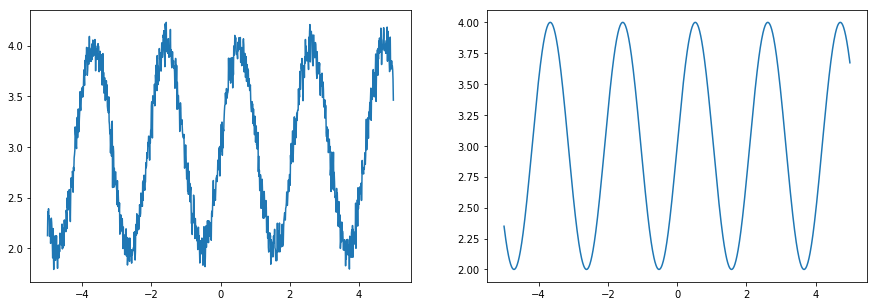

In [121]:
x = np.arange(-5, 5, 0.01)
y = np.sin(3 * x) + 3
noise = np.random.randn(x.shape[0]) / 10

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(x, y + noise)
plt.subplot(1, 2, 2)
plt.plot(x, y)


In [99]:
np.linspace(-5, 5)

array([-5.        , -4.79591837, -4.59183673, -4.3877551 , -4.18367347,
       -3.97959184, -3.7755102 , -3.57142857, -3.36734694, -3.16326531,
       -2.95918367, -2.75510204, -2.55102041, -2.34693878, -2.14285714,
       -1.93877551, -1.73469388, -1.53061224, -1.32653061, -1.12244898,
       -0.91836735, -0.71428571, -0.51020408, -0.30612245, -0.10204082,
        0.10204082,  0.30612245,  0.51020408,  0.71428571,  0.91836735,
        1.12244898,  1.32653061,  1.53061224,  1.73469388,  1.93877551,
        2.14285714,  2.34693878,  2.55102041,  2.75510204,  2.95918367,
        3.16326531,  3.36734694,  3.57142857,  3.7755102 ,  3.97959184,
        4.18367347,  4.3877551 ,  4.59183673,  4.79591837,  5.        ])

matrix([[1, 1],
        [1, 1]])

In [ ]:
from keras import applications

# build the VGG16 network
model = applications.VGG16(include_top=False,
                           weights='imagenet')

# get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers])

   40960/58889256 [..............................] - ETA: 37:21:31